In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loading mnist dataset

x_train = x_train/255.0  # scaling the pixel values to the range 0 to 1
x_test = x_test/255.0  # scaling the pixel values to the range 0 to 1

In [3]:
encoderIn = keras.Input(shape=(28, 28, 1), name='img') # Initialzing the encoder input image at input layer
x = keras.layers.Flatten()(encoderIn) #Flattening the input image from 3d to 1D array
encoderOut = keras.layers.Dense(64, activation="relu")(x) # outputing the encoded img at output layer,compressing the img
encoder = keras.Model(encoderIn, encoderOut, name='encoder') # Initializing the encoder

In [4]:
decoderIn = keras.layers.Dense(64, activation="relu")(encoderOut) # Initialzing the decoder input layer. Input is putput from output layer of encoder
x = keras.layers.Dense(784, activation="relu")(decoderIn) #Decompressing the image
decoderOut = keras.layers.Reshape((28, 28, 1))(x) #Reshaping the image to original configuration at Decoder Output layer



In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #Configuring with Adam optimisers with learning rate

autoencoder = keras.Model(encoderIn, decoderOut, name='autoencoder') #Initializinf autoencoder from encoder input to decoder output alyer
autoencoder.summary()

autoencoder.compile(opt, loss='mse') #Compiling with mean square error as loss function

epochs=8

for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1,
      batch_size=32, validation_split=0.10 # Dividing the dataset into 90:10 ratio of training and validation set. Dividing the training data into batches of 32 for each iteration of training and repeating the entire cycle epoch number of times
        )
    autoencoder.save(f"models/AE-{epoch+1}.model")

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 105360 (411.56 KB)
Trainable params: 1053

1/1 [==============================] - 0s 82ms/step
(64,)
[1.3012393  1.4172546  0.5551818  1.3472037  1.3698832  0.
 2.361962   2.0305023  0.79748046 0.         1.1520969  1.265698
 2.5982985  1.9275384  1.0251279  0.7901358  1.1921165  2.573753
 0.24360457 0.16010076 1.0303648  1.4867778  0.45418966 1.4115615
 1.0215459  1.626616   1.6735635  1.6114279  0.7604105  1.850636
 0.         0.01725012 1.0822252  1.0566431  0.628216   1.0048419
 1.1412739  1.2216544  2.490753   0.6280825  0.         0.38181785
 0.4708249  0.63429505 0.874293   0.9941753  1.6820482  1.78038
 1.1341031  0.2257504  0.882957   0.7016449  2.0055249  0.30011082
 0.75987864 1.2526641  1.0263829  0.         0.91359025 1.1399776
 1.4962407  0.         1.9232255  0.3031106 ]


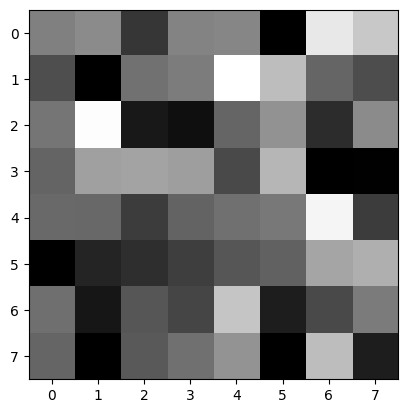

In [6]:
temp = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1)]) # compressing the img via encoder

print(temp[0].shape)
print(temp[0])
plt.imshow(temp[0].reshape((8,8)), cmap="gray") # Displaying the compressed image


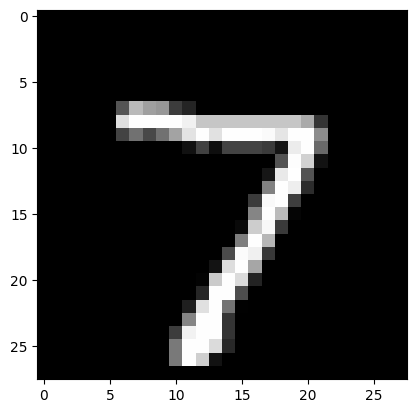

In [7]:
plt.imshow(x_test[0], cmap="gray") # Image without compression

1/1 [==============================] - 0s 72ms/step


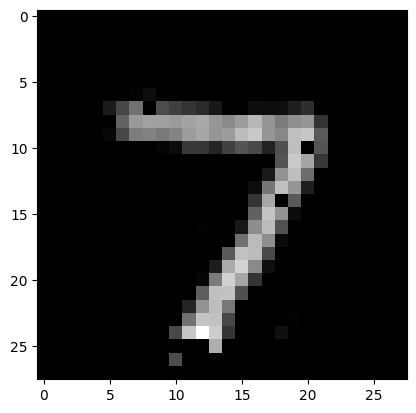

In [8]:
ae_out = autoencoder.predict([x_test[0].reshape(-1, 28, 28, 1) ]) # Using autoencoder to first compress and then reconstruct the original image
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0], cmap="gray") # Displaying reconstucted original image